In [5]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
# Charger le dataset
url = "https://raw.githubusercontent.com/SoukainaZAHTI/Exercice_KNN/master/Datasets/cardio_train.csv" 
df = pd.read_csv(url)
# Aperçu des données
print(df.head())
# Dimensions et informations
print(df.shape)
print(df.info())
# Vérification des valeurs manquantes
print(df.isnull().sum())
# Statistiques descriptives
print(df.describe())

   Age     Sex  BloodPressure  Cholesterol  Glucose  Smoking  Alcohol  \
0   45    Male            130          200      120        1        0   
1   50  Female            140          220      130        0        0   
2   35    Male            120          190      100        1        1   
3   60  Female            150          240      160        0        0   
4   42    Male            130          200      110        0        0   

   PhysicalActivity  Risk  
0                 0     1  
1                 1     1  
2                 0     0  
3                 1     1  
4                 1     0  
(282, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               282 non-null    int64 
 1   Sex               282 non-null    object
 2   BloodPressure     282 non-null    int64 
 3   Cholesterol       282 non-null    int64 
 4  

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Encodage des variables catégoriques
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == "Male" else 0)
# Variables explicatives (X) et cible (y)
X = df.drop('Risk', axis=1)
y = df['Risk']
# Normalisation des données continues
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

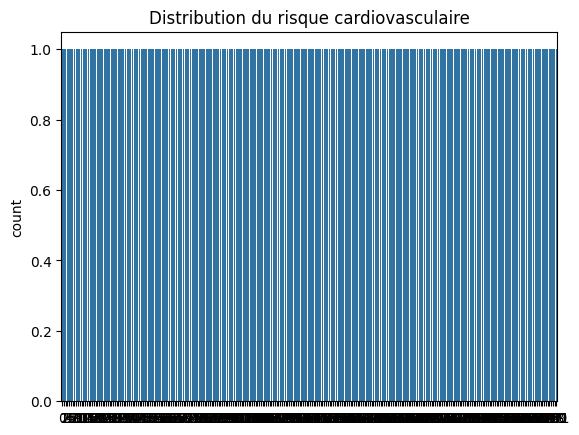

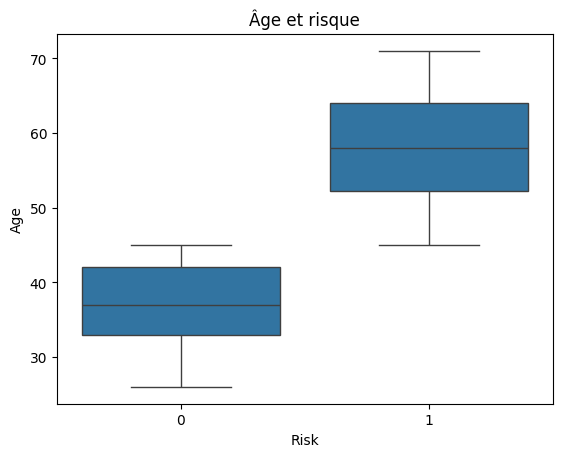

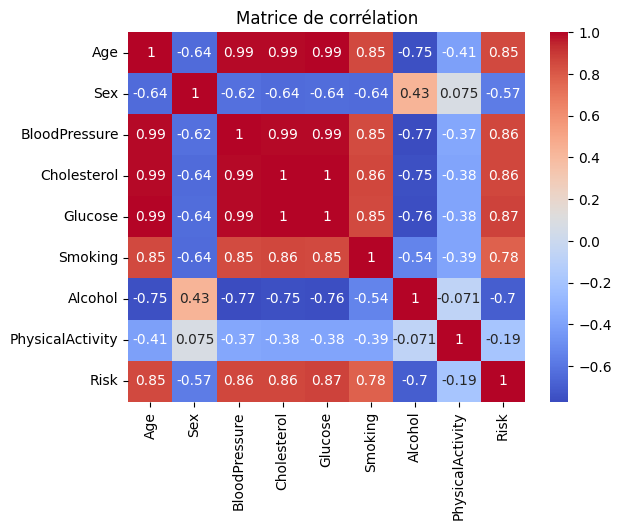

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution du risque
sns.countplot(df['Risk'])
plt.title("Distribution du risque cardiovasculaire")
plt.show()
# Analyse par âge
sns.boxplot(x='Risk', y='Age', data=df)
plt.title("Âge et risque")
plt.show()
# Matrice de corrélation
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
# Modèle de régression logistique
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
# Prédictions
y_pred_log = log_model.predict(X_test)
# Évaluation
print(classification_report(y_test, y_pred_log))
print("AUC-ROC :", roc_auc_score(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        36

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57

AUC-ROC : 1.0


In [9]:
from sklearn.ensemble import RandomForestClassifier
# Modèle de forêt aléatoire
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Prédictions
y_pred_rf = rf_model.predict(X_test)
# Évaluation
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC :", roc_auc_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        36

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57

AUC-ROC : 1.0


In [10]:
from sklearn.svm import SVC
# Modèle SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
# Prédictions
y_pred_svm = svm_model.predict(X_test)
# Évaluation
print(classification_report(y_test, y_pred_svm))
print("AUC-ROC :", roc_auc_score(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.99        36

    accuracy                           0.98        57
   macro avg       0.99      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57

AUC-ROC : 0.9761904761904762


In [11]:
from sklearn.model_selection import GridSearchCV
# Paramètres à optimiser
param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [5, 10, 20]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,
cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score AUC-ROC :", grid_search.best_score_)

Meilleurs paramètres : {'max_depth': 5, 'n_estimators': 50}
Meilleur score AUC-ROC : 1.0
